## Weather Forecasting using Time series

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df=pd.read_csv('weather_data_test.csv',parse_dates=['datetime'],sep=';',decimal=',',
              infer_datetime_format=True)

In [162]:
df.tail()

,datetime,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
1341,2019-05-17,13.783333,769.245833,769.587500,1.833333,10.50,16.60,40.500000,2.200000,14.795362,1.399982,1.398533,1.710145,28.880,5.120,88.869565,1.419130
1342,2019-05-18,15.508333,766.175000,766.512500,2.625000,12.60,18.35,41.666667,3.900000,15.223406,1.583696,1.557663,2.331522,27.380,6.845,57.971014,2.312174
1343,2019-05-19,16.595833,763.275000,763.616667,3.958333,13.95,19.25,43.125000,7.008333,7.622156,0.225435,0.245797,0.650362,6.125,6.125,58.288043,2.259058
1344,2019-05-20,17.258333,761.470833,761.804167,3.500000,14.85,18.75,36.458333,10.033333,4.692101,0.449982,0.438678,0.869565,1.805,6.125,35.824275,0.937971
1345,2019-05-21,18.433333,759.391667,759.733333,2.333333,15.60,21.80,30.583333,11.991667,7.862319,0.266014,0.271884,0.753623,1.280,14.580,21.818841,1.387754


In [163]:
df.shape

(1346, 17)

C:\Users\Priyanka Sharma\AppData\Local\Temp\ipykernel_14960\2249596087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

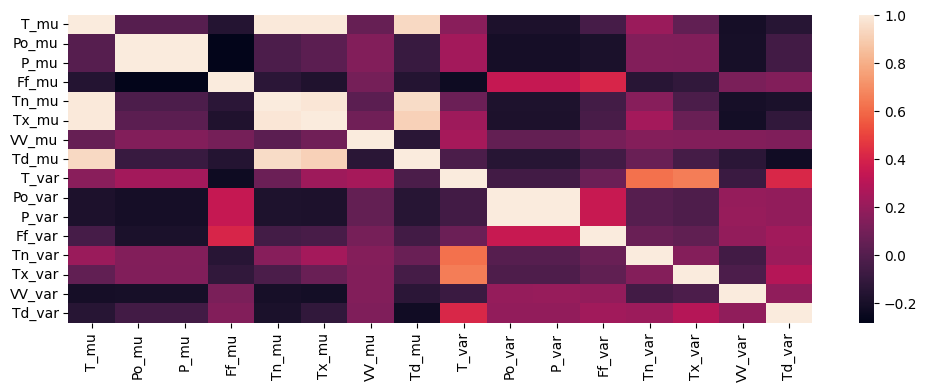

In [164]:
import seaborn as sns
sns.heatmap(df.corr())

In [165]:

df_val=df[(df['datetime']>='2019-04-01')&(df['datetime']<='2019-05-21')]

In [166]:
#Dropping 2015 data
# setting validation set for final validation of models

df=df[(df['datetime']>='2016-01-01')&(df['datetime']<='2019-03-31')]

df.set_index('datetime',inplace=True)                                     
df.tail()                               

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
datetime,,,,,,,,,,,,,,,,
2019-03-27,0.066667,763.500000,763.850000,2.791667,-2.95,1.75,43.416667,-5.583333,5.968406,1.332174,1.295652,0.954710,2.645,3.645,59.297101,7.553623
2019-03-28,3.429167,764.425000,764.770833,3.166667,-0.35,4.80,39.583333,0.200000,7.176069,2.241957,2.309982,1.275362,0.605,13.520,47.644928,1.342609
2019-03-29,6.112500,757.012500,757.345833,3.791667,3.60,8.35,35.875000,2.362500,5.233315,4.198533,4.206069,0.432971,2.000,19.845,101.679348,0.568533
2019-03-30,5.204167,755.400000,755.750000,3.833333,3.15,7.95,25.333333,1.841667,4.169982,1.410435,1.418261,0.579710,0.245,8.405,80.753623,0.461667
2019-03-31,3.421739,751.847826,752.204348,5.173913,2.30,4.80,35.739130,0.104348,0.810870,10.870791,10.911344,2.422925,0.000,1.280,330.292490,10.163162


In [167]:
df_val.tail()

,datetime,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
1341,2019-05-17,13.783333,769.245833,769.587500,1.833333,10.50,16.60,40.500000,2.200000,14.795362,1.399982,1.398533,1.710145,28.880,5.120,88.869565,1.419130
1342,2019-05-18,15.508333,766.175000,766.512500,2.625000,12.60,18.35,41.666667,3.900000,15.223406,1.583696,1.557663,2.331522,27.380,6.845,57.971014,2.312174
1343,2019-05-19,16.595833,763.275000,763.616667,3.958333,13.95,19.25,43.125000,7.008333,7.622156,0.225435,0.245797,0.650362,6.125,6.125,58.288043,2.259058
1344,2019-05-20,17.258333,761.470833,761.804167,3.500000,14.85,18.75,36.458333,10.033333,4.692101,0.449982,0.438678,0.869565,1.805,6.125,35.824275,0.937971
1345,2019-05-21,18.433333,759.391667,759.733333,2.333333,15.60,21.80,30.583333,11.991667,7.862319,0.266014,0.271884,0.753623,1.280,14.580,21.818841,1.387754


In [7]:
#checking null values
df.isnull().sum()

T_mu      0
Po_mu     0
P_mu      0
Ff_mu     0
Tn_mu     0
Tx_mu     0
VV_mu     0
Td_mu     0
T_var     0
Po_var    0
P_var     0
Ff_var    0
Tn_var    0
Tx_var    0
VV_var    0
Td_var    0
dtype: int64

### Visulization of Data

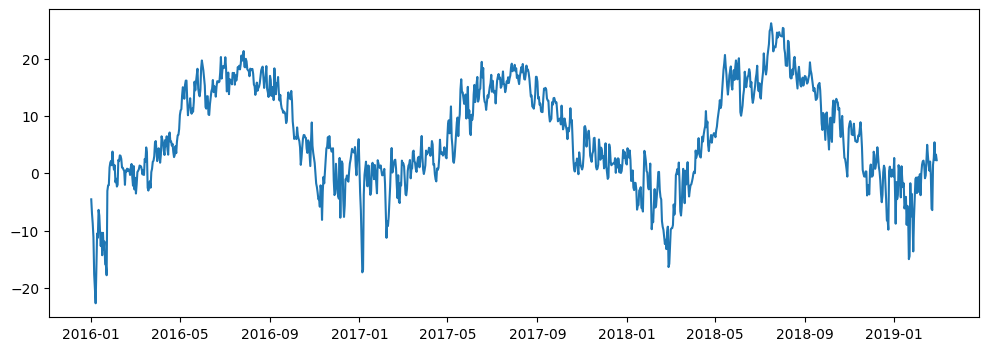

In [8]:
# data seems to be seasonal from the plot
plt.figure(figsize=(12,4))
plt.plot(df.index,df.T_mu)

<AxesSubplot: xlabel='datetime'>

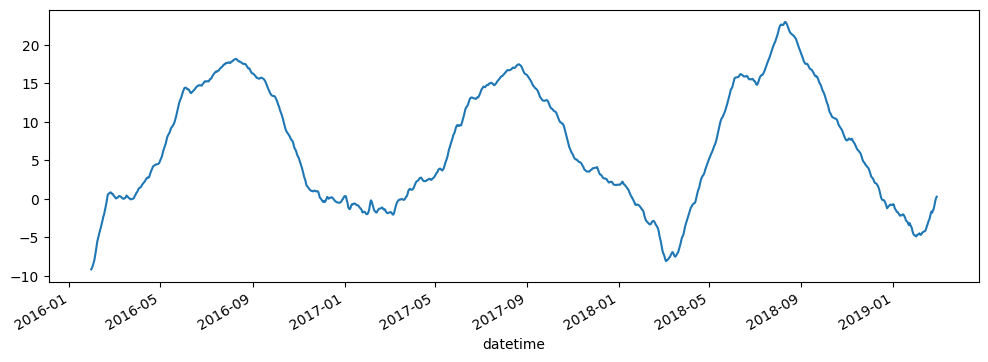

In [9]:
# smoothing data
df_mean=df.T_mu.rolling(window=30).mean()
df_mean.plot(figsize=(12,4))

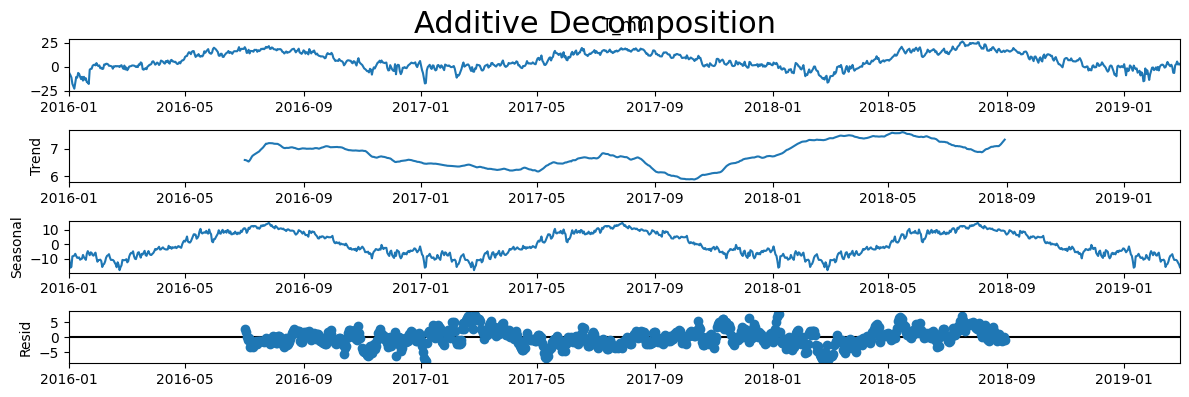

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df.T_mu, model='additive', period=365)

# Plot
plt.rcParams.update({'figure.figsize': (12,4)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

### Stationary Test- Dicky-Fuller

Check if the data is stationary

Null Hypothesis  Ho -> Unit root =1 (Data is not Stationary) ,P value > 0.05

Alternate Hypothesis H1 -> Unit root <1 (Data is Stationary)  , P value <= 0.05

Augmented Dicky fuller test is extension of dicky-fuller test which remove autocorrelation from the series and then tests similarly as dicky-fuller test.

In [11]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(temp):
    results=adfuller(temp,autolag='AIC')
    print('ADF Statistic: %f' % results[0])

    print('p-value: %f' % results[1])

    print('Critical Values:')

    for key, value in results[4].items():
        print('\t%s: %.3f' % (key, value))
    if results[0] < results[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")


In [12]:
adfuller_test(df.T_mu)

ADF Statistic: -2.597909
p-value: 0.093430
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


### Differencing

Convert not stationanry data to stationary using differencing

In [13]:
df['T_mu first difference']=df['T_mu']-df['T_mu'].shift(1)

C:\Users\Priyanka Sharma\AppData\Local\Temp\ipykernel_14960\3683821508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T_mu first difference']=df['T_mu']-df['T_mu'].shift(1)


In [14]:
# Seasonal differencing

df['Seasonal first difference']=df['T_mu']-df['T_mu'].shift(12)

C:\Users\Priyanka Sharma\AppData\Local\Temp\ipykernel_14960\531240534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seasonal first difference']=df['T_mu']-df['T_mu'].shift(12)


In [15]:
df.head(14)

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,T_mu first difference,Seasonal first difference
datetime,,,,,,,,,,,,,,,,,,
2016-01-01,-4.5500,779.3250,779.6625,4.750,-4.80,-3.25,28.2500,-7.8375,1.354286,2.156429,2.182679,1.071429,1.280,0.845,19.928571,1.968393,NaN,NaN
2016-01-02,-7.0000,783.2250,783.6000,3.500,-7.40,-5.50,17.3625,-10.3250,1.251429,1.473571,1.534286,0.857143,0.320,0.000,57.508393,0.530714,-2.4500,NaN
2016-01-03,-8.7375,768.4750,768.8375,4.000,-9.35,-7.50,22.2500,-11.0250,0.448393,32.233571,31.788393,2.571429,0.845,0.180,100.785714,0.987857,-1.7375,NaN
2016-01-04,-11.1750,760.5125,760.8375,4.125,-12.95,-8.20,15.2500,-13.8000,11.065000,3.515536,3.468393,0.696429,0.605,21.780,75.928571,11.748571,-2.4375,NaN
2016-01-05,-17.6250,756.3625,756.7375,3.750,-19.25,-14.50,5.3875,-20.2750,1.273571,0.416964,0.374107,1.357143,0.245,2.880,14.286964,1.447857,-6.4500,NaN
2016-01-06,-20.2625,760.2500,760.6375,3.125,-20.70,-17.60,18.2500,-23.1250,1.616964,0.922857,0.914107,0.410714,0.720,2.880,54.214286,1.707857,-2.6375,NaN
2016-01-07,-22.6750,761.4000,761.7750,2.750,-23.65,-21.00,14.1375,-25.9125,1.039286,0.048571,0.045000,0.214286,0.005,0.180,56.385536,0.612679,-2.4125,NaN
2016-01-08,-16.5250,759.8875,760.2750,1.875,-22.65,-15.50,13.4875,-19.4000,34.850714,1.115536,1.147857,1.553571,3.125,64.980,31.472679,31.017143,6.1500,NaN
2016-01-09,-10.5250,759.3875,759.7500,3.500,-11.35,-8.60,6.9250,-13.0125,1.653571,0.721250,0.700000,0.571429,0.605,0.320,47.865000,1.095536,6.0000,NaN


In [16]:
# After one seasonal difference data is stationary
adfuller_test(df['Seasonal first difference'].dropna())

ADF Statistic: -6.867262
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


In [17]:
adfuller_test(df['T_mu first difference'].dropna())

ADF Statistic: -12.221126
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### Plot ACF and PACF

###### Partial Autocorrelation- 
Direct effect of number of periods ago value on current value without the effect comes through other time periods
(T-2 > T). or The partial autocorrelation at lag k is the autocorrelation between X_t_t and X_(t-k) that is not accounted for by lags 1 through 𝑘−1.


###### AR (Auto-Regressive model) - 
It assumes that current value (y_t) is dependent on previous values ((y_(t-1), y_(t-2), …) , by which we can build linear regression model 

Identify Order of the AR model with PACF plot - The number of non-zero partial autocorrelations which are outside of upper bound and lower bound gives the order of AR model. The 'order of the model is the most extreme lag of x that is used as predictor.

###### Autocorrelation - 
Indirect Pearson Correlation between cuurent value and number of periods ago value cosidering effect comes through other time periods as well 
(T-2 > T-1 > T)

###### Moving Average model - 
It assumes that the current value(y_t) is dependent on the error terms including the current error (𝜖_t, 𝜖_(t-1),…). Because error terms are random, there’s no linear relationship between the current value and the error terms.

Identify Order of MA model with ACF plot -For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. The ACF will have non-zero autocorrelations only at lags involved in the model



This blue area depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


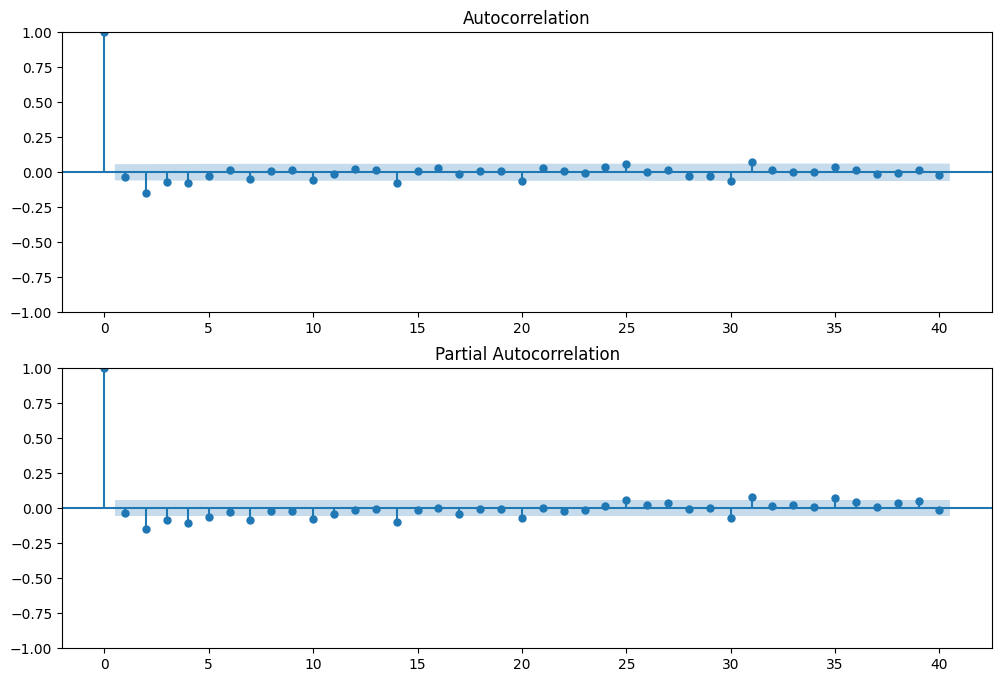

In [19]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['T_mu first difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['T_mu first difference'].iloc[13:],lags=40,ax=ax2)

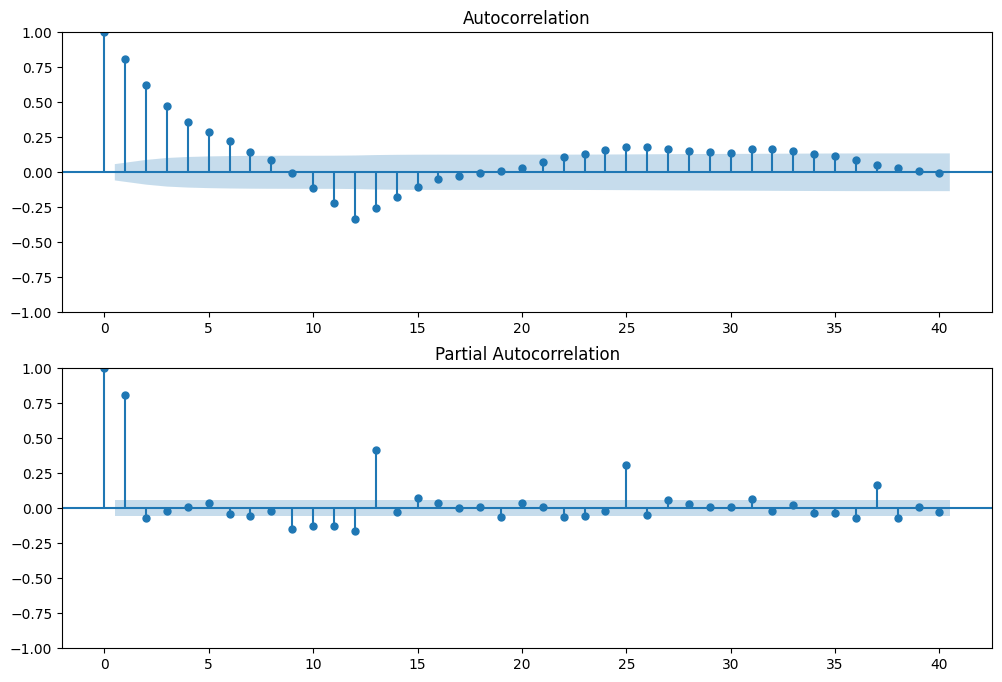

In [20]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first difference'].iloc[13:],lags=40,ax=ax2)

In [21]:
#Training and Testing data
df_train=df.iloc[:1000]
df_test=df.iloc[1000:]
df_train.head()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,T_mu first difference,Seasonal first difference
datetime,,,,,,,,,,,,,,,,,,
2016-01-01,-4.5500,779.3250,779.6625,4.750,-4.80,-3.25,28.2500,-7.8375,1.354286,2.156429,2.182679,1.071429,1.280,0.845,19.928571,1.968393,NaN,NaN
2016-01-02,-7.0000,783.2250,783.6000,3.500,-7.40,-5.50,17.3625,-10.3250,1.251429,1.473571,1.534286,0.857143,0.320,0.000,57.508393,0.530714,-2.4500,NaN
2016-01-03,-8.7375,768.4750,768.8375,4.000,-9.35,-7.50,22.2500,-11.0250,0.448393,32.233571,31.788393,2.571429,0.845,0.180,100.785714,0.987857,-1.7375,NaN
2016-01-04,-11.1750,760.5125,760.8375,4.125,-12.95,-8.20,15.2500,-13.8000,11.065000,3.515536,3.468393,0.696429,0.605,21.780,75.928571,11.748571,-2.4375,NaN
2016-01-05,-17.6250,756.3625,756.7375,3.750,-19.25,-14.50,5.3875,-20.2750,1.273571,0.416964,0.374107,1.357143,0.245,2.880,14.286964,1.447857,-6.4500,NaN


### Sarima Model

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:


# Fit the SARIMAX (Seasonal ARIMA with seasonality of 12 months)
mod = SARIMAX(df_train.T_mu,#exogenous=df_train[['Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']],
                                order=(2, 1, 2),
                                seasonal_order=(1, 0, 6, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


###### Evaluation metrics of Time series AIC and BIC

log likelihood (l)
number of parameters(k)
number of samples used for fitting(n)

1. AIC =2k-2l
Lower AIC means higher log likelihood or less parameters

2. BIC = ln(n)k-2l
Lower BIC means higher log likelihood or less parameters or less samples used in fitting



In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:                                                T_mu   No. Observations:                 1000
Model:             SARIMAX(2, 1, 2)x(1, 0, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood               -1943.543
Date:                                             Tue, 18 Apr 2023   AIC                           3911.086
Time:                                                     17:27:04   BIC                           3969.030
Sample:                                                          0   HQIC                          3933.193
                                                            - 1000                                         
Covariance Type:                                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.211      2.945      0.003       0.208       1.034
ar.L2          0.0052      0.172      0.030      0.976      -0.332       0.342
ma.L1         -0.9471      0.245     -3.870      0.000      -1.427      -0.467
ma.L2         -0.2421      0.248     -0.976      0.329      -0.728       0.244
ar.S.L12      -0.1694      0.594     -0.285      0.776      -1.334       0.995
ma.S.L12       0.1737      0.594      0.293      0.770      -0.990       1.337
ma.S.L24       0.0851      0.033      2.599      0.009       0.021       0.149
ma.S.L36       0.0542      0.059      0.915      0.360      -0.062       0.170
ma.S.L48       0.0138      0.040      0.344      0.731      -0.065       0.092
ma.S.L60      -0.0036      0.036     -0.100      0.920      -0.074       0.067
ma.S.L72      -0.0063      0.035     -0.183      0.855      -0.074       0.061
sigma2         2.9360      0.288     10.203      0.000       2.372       3.500
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               180.87
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.09
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
y_pred = results.get_forecast(len(df_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = results.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df["Predictions"]

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


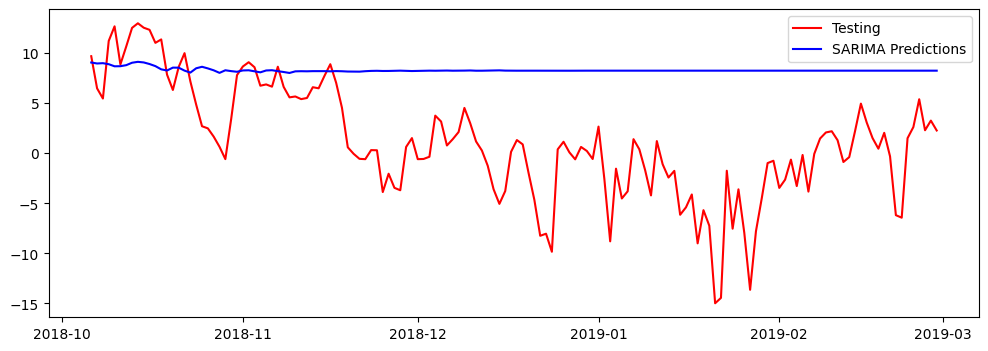

In [26]:
#plt.plot(df_train.T_mu, color = "black",label='Training')
plt.plot(df_test.T_mu, color = "red",label='Testing')


plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')

plt.legend()
plt.show()

In [81]:
mse_sarima=mean_squared_error(y_pred_out,df_test.T_mu)

AIC_sarima=results.aic

BIC_sarima=results.bic

### Grid Search CV

In [19]:
import itertools

p=d=q=range(0,3)

pdq=list(itertools.product(p,d,q))
seasonal_params=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
seasonal_params

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [20]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
def sarima_grid(df,pdq,pdqs,maxiter=50):
    results=[]
    for param in pdq:
        for param_seasonal in pdqs:
            try:
                model=SARIMAX(df,order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationary=False,
                                           enforce_invertibility=False
                                            )
                
                
                result=model.fit(maxiter=maxiter)
                results.append([param,param_seasonal,result.bic,result.aic,result.mae])
                print('Sarimax{} * {}12 : Bic ={} : AIC ={},MAE ={}'.format(param,param_seasonal,result.bic,results.aic,results.mae))
                #y_forecast=pred.predicted_mean
                #y_actual=df.T_mu['2017-05-19':]
                #round(np.sqrt(mean_squared_error(y_actual,y_forecast,squared=True)),2)
                
            except:
                continue
            
        
    ans_df = pd.DataFrame(results, columns=['pdq', 'pdqs', 'bic','AIC','mae'])
    

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
sarima_grid(df.T_mu,pdq,seasonal_params)

,pdq,pdqs,bic,AIC,mae
378,"(1, 1, 2)","(0, 0, 0, 12)",5069.693809,5049.521169,1.628461
593,"(2, 1, 1)","(0, 0, 0, 12)",5070.087204,5049.914564,1.628403
382,"(1, 1, 2)","(0, 1, 1, 12)",5074.777313,5049.614192,1.691775
597,"(2, 1, 1)","(0, 1, 1, 12)",5075.210824,5050.047703,1.691766
351,"(1, 1, 1)","(0, 0, 0, 12)",5075.592521,5060.463042,1.641202


In [27]:
model = SARIMAX(df_train.T_mu,
                                order=(1, 1, 2),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultGrid = model.fit()

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
pred = resultGrid.get_forecast(len(df_test.index))
pred_df = pred.conf_int(alpha = 0.05) 
pred_df["Predictions"] = resultGrid.predict(start = pred_df.index[0], end =pred_df.index[-1])
pred_df.index = df_test.index
pred_out =pred_df["Predictions"]

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


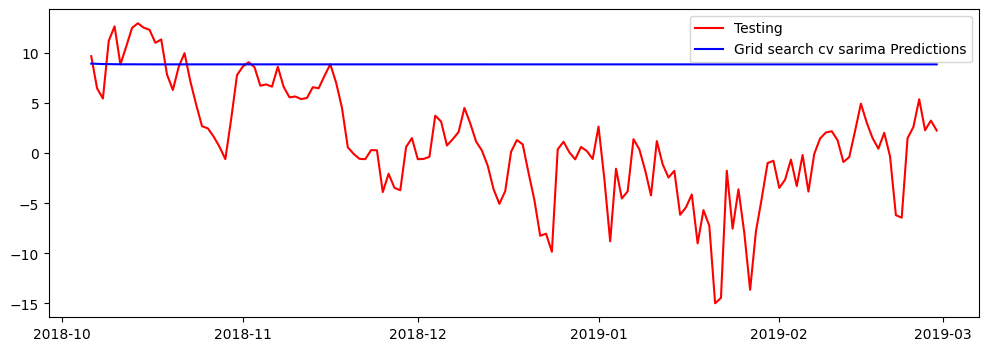

In [29]:
plt.plot(df_test.T_mu, color = "red",label='Testing')

plt.plot(pred_out, color='Blue', label = 'Grid search cv sarima Predictions')

plt.legend()
plt.show()

In [80]:
mse_grid=mean_squared_error(pred_out,df_test.T_mu)

AIC_grid=resultGrid.aic

BIC_grid=resultGrid.bic

### Auto arima

In [5]:
#auto-arima
from pmdarima import auto_arima
autoarima_mod=auto_arima(df_train.T_mu,
                start_p=0,d=1,start_q=0,
                    max_p=6,max_d=2,max_q=6,start_P=0
                    ,D=1,start_Q=0,max_P=6,max_D=2,max_Q=6,
                    m=12,seasonal=True,error_action='warn',trace=True,
                    supress_warnings=True,stepwise=True,
                    random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4987.429, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4667.795, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4989.275, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4546.708, Time=0.65 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=4507.958, Time=1.32 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=4487.626, Time=2.28 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=4471.347, Time=5.91 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=4458.627, Time=10.18 sec
 ARIMA(1,1,0)(6,1,1)[12]             : AIC=inf, Time=336.66 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=189.19 sec
 ARIMA(0,1,0)(6,1,0)[12]             : AIC=4456.681, Time=10.17 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=4469.348, Time=4.93 sec
 ARIMA(0,1,0)(6,1,1)[12]             : AIC=inf, Time=314.95 sec
 ARIMA(0,1,0)(5,1,1)[12]       

In [6]:
autoarima_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1000
Model:             SARIMAX(2, 1, 1)x(6, 1, [], 12)   Log Likelihood               -2198.527
Date:                             Fri, 07 Apr 2023   AIC                           4417.054
Time:                                     15:18:30   BIC                           4466.001
Sample:                                          0   HQIC                          4435.669
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8618      0.037     23.097      0.000       0.789       0.935
ar.L2         -0.0931      0.029     -3.264      0.001      -0.149      -0.037
ma.L1         -0.9113      0.027    -34.120      0.000      -0.964      -0.859
ar.S.L12      -0.8533      0.032    -26.685      0.000      -0.916      -0.791
ar.S.L24      -0.6477      0.041    -15.742      0.000      -0.728      -0.567
ar.S.L36      -0.4551      0.045    -10.104      0.000      -0.543      -0.367
ar.S.L48      -0.3352      0.045     -7.525      0.000      -0.422      -0.248
ar.S.L60      -0.2307      0.042     -5.447      0.000      -0.314      -0.148
ar.S.L72      -0.1193      0.033     -3.657      0.000      -0.183      -0.055
sigma2         4.9737      0.171     29.058      0.000       4.638       5.309
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               132.35
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.11
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
auto_mod=SARIMAX(df_train.T_mu,#exogenous=df_train[['Po_mu', 'P_mu', 'Ff_mu', 'Tn_mu', 'Tx_mu', 'VV_mu', 'Td_mu', 'T_var', 'Po_var', 'P_var', 'Ff_var', 'Tn_var', 'Tx_var', 'VV_var', 'Td_var']],
                                order=(2, 1, 1),
                                seasonal_order=(6, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

result_auto=auto_mod.fit()

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
result_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                T_mu   No. Observations:                 1000
Model:             SARIMAX(2, 1, 1)x(6, 1, [], 12)   Log Likelihood               -1983.247
Date:                             Tue, 18 Apr 2023   AIC                           3986.494
Time:                                     17:35:50   BIC                           4034.662
Sample:                                          0   HQIC                          4004.882
                                            - 1000                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8346      0.040     20.714      0.000       0.756       0.914
ar.L2         -0.1341      0.030     -4.511      0.000      -0.192      -0.076
ma.L1         -1.1277      0.041    -27.741      0.000      -1.207      -1.048
ar.S.L12      -0.8455      0.034    -24.774      0.000      -0.912      -0.779
ar.S.L24      -0.6178      0.044    -14.173      0.000      -0.703      -0.532
ar.S.L36      -0.4531      0.048     -9.480      0.000      -0.547      -0.359
ar.S.L48      -0.3272      0.046     -7.086      0.000      -0.418      -0.237
ar.S.L60      -0.2088      0.041     -5.082      0.000      -0.289      -0.128
ar.S.L72      -0.0959      0.032     -2.993      0.003      -0.159      -0.033
sigma2         3.5464      0.282     12.572      0.000       2.994       4.099
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                83.00
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.10
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
preds = result_auto.get_forecast(len(df_test.index))
preds_df = preds.conf_int(alpha = 0.05) 
preds_df["Predictions_auto"] = result_auto.predict(start = preds_df.index[0], end =preds_df.index[-1])
preds_df.index = df_test.index
preds_out =preds_df["Predictions_auto"]

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
mse_auto=mean_squared_error(preds_out,df_test.T_mu)

AIC_auto=result_auto.aic

BIC_auto=result_auto.bic

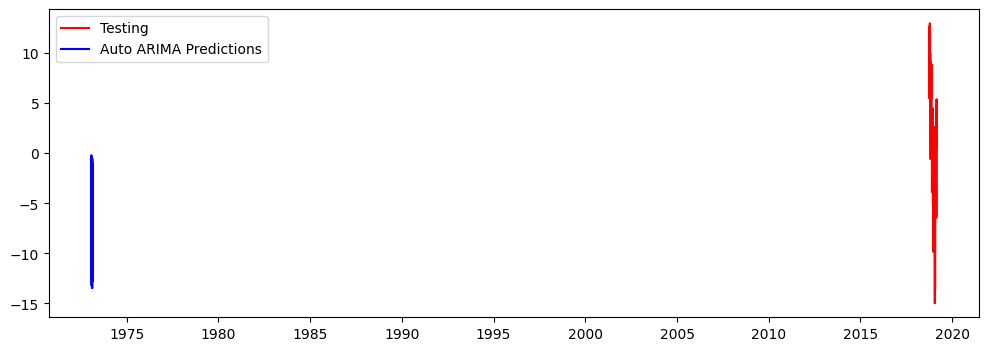

In [69]:

plt.plot(df_test.T_mu, color = "red",label='Testing')

plt.plot(pred, color='Blue', label = 'Auto ARIMA Predictions')

plt.legend()
plt.show()


In [48]:
df=df.iloc[:,:1]
df.head()

,T_mu
datetime,
2016-01-01,-4.5500
2016-01-02,-7.0000
2016-01-03,-8.7375
2016-01-04,-11.1750
2016-01-05,-17.6250


### Cross validation inTime series

The method that can be used for cross-validating the time-series model is cross-validation on a rolling basis. Start with a small subset of data for training purpose, forecast for the later data points and then checking the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted.

In [52]:
# cross validation in time series
MSE1=[]
from sklearn.metrics import mean_squared_error
from sklearn.model_selection  import TimeSeriesSplit
tscv =TimeSeriesSplit(n_splits=5,test_size=28)
for train_index,test_index in tscv.split(df):
    x_train,x_test=df.iloc[train_index],df.iloc[test_index]
    y_train,y_test=df.index[train_index],df.index[test_index]
    mod = SARIMAX(x_train,order=(1, 1, 2),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
    
    pred=mod.forecast(len(x_test.index))
   
    
    MSE1.append(round(mean_squared_error(x_test,pred),2))
    print(MSE1)
    

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A dat

[25.41]


C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[25.41, 52.38]


C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[25.41, 52.38, 21.05]


C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[25.41, 52.38, 21.05, 34.41]
[25.41, 52.38, 21.05, 34.41, 77.82]


C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [53]:
 Overall_MSE=round(sum(MSE1)/5,2)
print ("Overall MSE:", Overall_MSE) 

Overall MSE: 42.21


### Model Comparison

In [120]:
mse=[]
mse.append(Overall_MSE)

mse.append(mse_auto)
mse.append(mse_grid)
mse.append(mse_sarima)


In [119]:
print('MSE of Cross Validaton \t\t\t \t', mse[0])
print('MSE of Sarima (2,1,2)(1,0,6,12) \t\t',mse[3])
print('MSE of Auto arima (2,1,1)(6,1,0,12) \t \t',mse[1])
print('MSE of Grid Search sarima (1,1,2)(0,0,0,12) \t',mse[2])


MSE of Cross Validaton 			 	 42.21
MSE of Sarima (2,1,2)(1,0,6,12) 		 82.55825382701593
MSE of Auto arima (2,1,1)(6,1,0,12) 	 	 85.72220798374383
MSE of Grid Search sarima (1,1,2)(0,0,0,12) 	 92.20397772009898


In [114]:
aic=[]
aic.append(AIC_auto)
aic.append(AIC_grid)
aic.append(AIC_sarima)

print('AIC of Sarima (2,1,2)(1,0,6,12)  \t\t',aic[2])
print('AIC of Auto arima (2,1,1)(6,1,0,12) \t \t',aic[0])
print('AIC of Grid Search sarima (1,1,2)(0,0,0,12) \t',aic[1])


AIC of Sarima (2,1,2)(1,0,6,12)  		 3911.0859050908875
AIC of Auto arima (2,1,1)(6,1,0,12) 	 	 3986.494308668623
AIC of Grid Search sarima (1,1,2)(0,0,0,12) 	 4279.743647568052


In [116]:
bic=[]
bic.append(BIC_auto)
bic.append(BIC_grid)
bic.append(BIC_sarima)

print('BIC of Sarima (2,1,2)(1,0,6,12)  \t\t',bic[2])
print('BIC of Auto arima (2,1,1)(6,1,0,12) \t \t',bic[0])
print('BIC of Grid Search sarima (1,1,2)(0,0,0,12) \t',bic[1])

BIC of Sarima (2,1,2)(1,0,6,12)  		 3969.030449950588
BIC of Auto arima (2,1,1)(6,1,0,12) 	 	 4034.661667474573
BIC of Grid Search sarima (1,1,2)(0,0,0,12) 	 4299.358636598391


### Observation  and Validating best performing Sarima model on Validation set
Sarima (2,1,2)(1,0,6,12) performed better as compared to all other models 

In [176]:
df_val.tail()

,datetime,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var
1341,2019-05-17,13.783333,769.245833,769.587500,1.833333,10.50,16.60,40.500000,2.200000,14.795362,1.399982,1.398533,1.710145,28.880,5.120,88.869565,1.419130
1342,2019-05-18,15.508333,766.175000,766.512500,2.625000,12.60,18.35,41.666667,3.900000,15.223406,1.583696,1.557663,2.331522,27.380,6.845,57.971014,2.312174
1343,2019-05-19,16.595833,763.275000,763.616667,3.958333,13.95,19.25,43.125000,7.008333,7.622156,0.225435,0.245797,0.650362,6.125,6.125,58.288043,2.259058
1344,2019-05-20,17.258333,761.470833,761.804167,3.500000,14.85,18.75,36.458333,10.033333,4.692101,0.449982,0.438678,0.869565,1.805,6.125,35.824275,0.937971
1345,2019-05-21,18.433333,759.391667,759.733333,2.333333,15.60,21.80,30.583333,11.991667,7.862319,0.266014,0.271884,0.753623,1.280,14.580,21.818841,1.387754


In [171]:
y_pred = results.get_forecast(len(df_val.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = results.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_val.index
y_pred_out = y_pred_df["Predictions"]

C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Priyanka Sharma\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


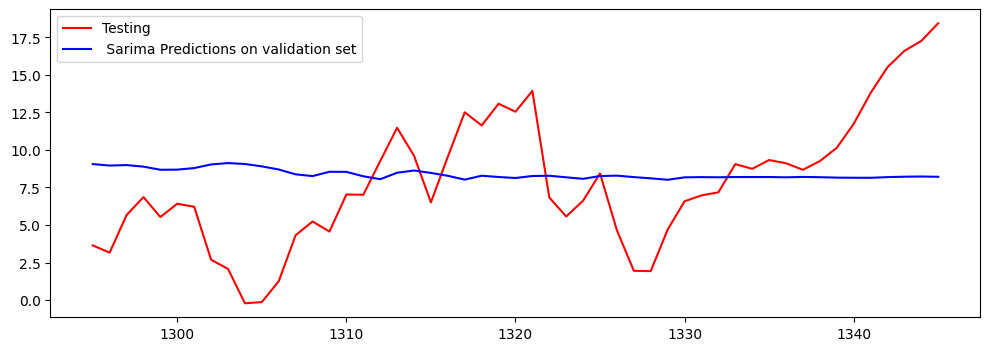

In [173]:
plt.plot(df_val.T_mu, color = "red",label='Testing')

plt.plot(y_pred_out, color='Blue', label = ' Sarima Predictions on validation set')

plt.legend()
plt.show()

In [174]:
print('MSE',mean_squared_error(y_pred_out,df_val.T_mu))

MSE 20.815015368712583
